In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, MaxPooling2D, Flatten, Conv2D, BatchNormalization, Activation, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools


from tensorflow.keras.preprocessing import image


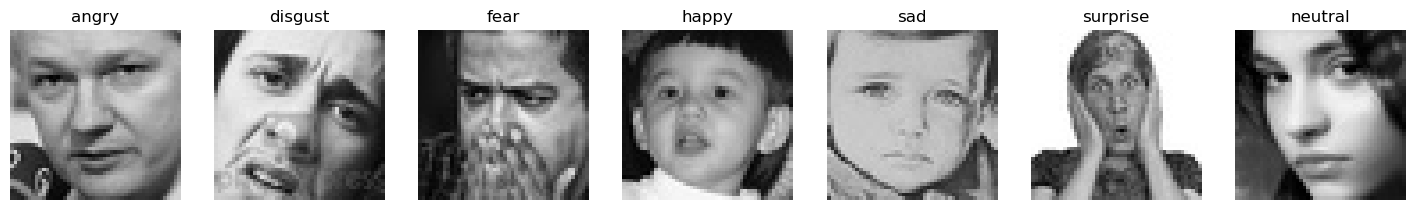

In [ ]:
train_dir = '/Users/ashok/Desktop/EmotionClassifier/FER 2013 Dataset/train'
val_dir = '/Users/ashok/Desktop/EmotionClassifier/FER 2013 Dataset/test'

img_size = 48

emotion_list = ['angry', 'disgust', 'fear', 'happy','neutral', 'sad', 'surprise']

plt.figure(figsize=(18,22))
i = 1
for expression in emotion_list:
    img = image.load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[59]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()


In [4]:
datagen_train = ImageDataGenerator(rescale = 1./255,)

datagen_val = ImageDataGenerator(rescale = 1./255,)     

In [13]:
img_size = 48

batch_size = 64

train_set = datagen_train.flow_from_directory(directory=train_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=True
                                              )

val_set = datagen_train.flow_from_directory(directory=val_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=False
                                              )



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential()

# First layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=None, input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(64, (3, 3), padding='same', activation=None))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second layer
model.add(Conv2D(128, (5, 5), padding='same', activation=None))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third layer
model.add(Conv2D(512, (3, 3), padding='same', activation=None))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fourth layer
model.add(Conv2D(256, (3, 3), padding='same', activation=None))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten 
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.30))

# Output layer
model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,726,151 (10.40 MB)

 Trainable params: 2,722,695 (10.39 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [16]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

history = model.fit(train_set, validation_data=val_set, epochs=35)


Epoch 1/35
449/449 ━━━━━━━━━━━━━━━━━━━━ 399s 885ms/step - accuracy: 0.1819 - loss: 2.5910 - val_accuracy: 0.2534 - val_loss: 2.1649
Epoch 2/35
449/449 ━━━━━━━━━━━━━━━━━━━━ 407s 906ms/step - accuracy: 0.2419 - loss: 2.1541 - val_accuracy: 0.3310 - val_loss: 1.7446
Epoch 3/35
449/449 ━━━━━━━━━━━━━━━━━━━━ 369s 821ms/step - accuracy: 0.2889 - loss: 1.9864 - val_accuracy: 0.3533 - val_loss: 1.6614
Epoch 4/35
449/449 ━━━━━━━━━━━━━━━━━━━━ 356s 794ms/step - accuracy: 0.3134 - loss: 1.8699 - val_accuracy: 0.3802 - val_loss: 1.6042
Epoch 5/35
449/449 ━━━━━━━━━━━━━━━━━━━━ 365s 813ms/step - accuracy: 0.3546 - loss: 1.7536 - val_accuracy: 0.4257 - val_loss: 1.5172
Epoch 6/35
449/449 ━━━━━━━━━━━━━━━━━━━━ 352s 784ms/step - accuracy: 0.3833 - loss: 1.6589 - val_accuracy: 0.4354 - val_loss: 1.4684
Epoch 7/35
449/449 ━━━━━━━━━━━━━━━━━━━━ 342s 762ms/step - accuracy: 0.4019 - loss: 1.5913 - val_accuracy: 0.4448 - val_loss: 1.4730
Epoch 8/35
449/449 ━━━━━━━━━━━━━━━━━━━━ 443s 987ms/step - accuracy: 0.4263 -

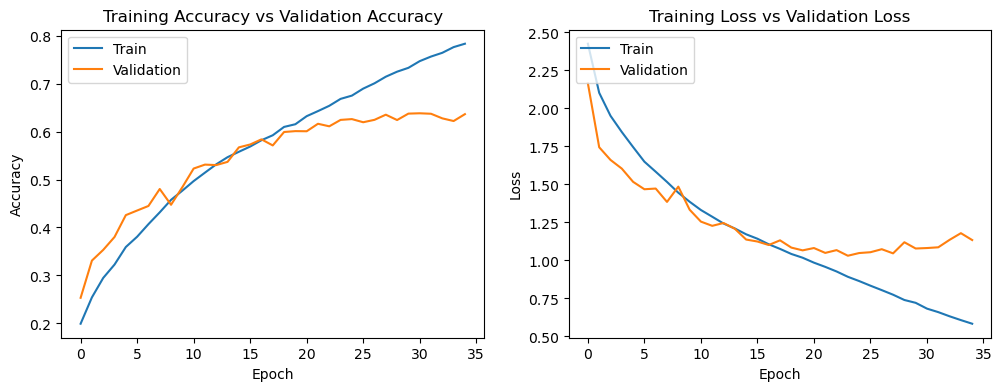

In [17]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')f f
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step


<Figure size 640x480 with 0 Axes>

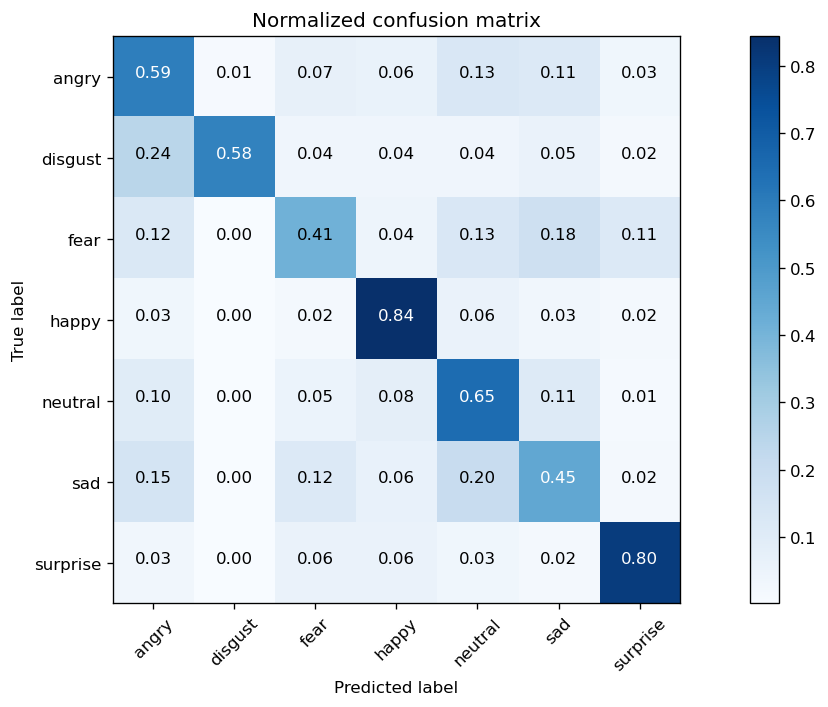

In [18]:
predictions = model.predict(val_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_set.classes
class_names = val_set.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12,6), dpi=120)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision (Macro Avg): {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall (Macro Avg): {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.6362
Precision (Macro Avg): 0.6353
Recall (Macro Avg): 0.6166

Classification Report:
              precision    recall  f1-score   support

       angry       0.51      0.59      0.55       958
     disgust       0.74      0.58      0.65       111
        fear       0.54      0.41      0.47      1024
       happy       0.82      0.84      0.83      1774
     neutral       0.55      0.65      0.60      1233
         sad       0.53      0.45      0.48      1247
    surprise       0.75      0.80      0.78       831

    accuracy                           0.64      7178
   macro avg       0.64      0.62      0.62      7178
weighted avg       0.63      0.64      0.63      7178



(48, 48)


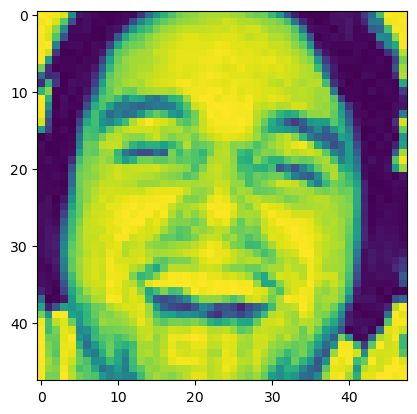

In [20]:
img = image.load_img("/Users/ashok/Desktop/EmotionClassifier/FER 2013 Dataset/test/happy/PrivateTest_5142883.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) 

In [21]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}


In [22]:
mg = np.expand_dims(img,axis = 0) 
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
[0.0, 0.0, 1.0, 6.3075e-38, 4.4417927e-23, 0.0, 0.0]


In [23]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Fear


In [24]:
model.save('model_78_64.h5')

In [26]:
model.save_weights('model_weights_78_64.weights.h5')